I choos mnist fashion dataset which has 60000 pictures in 10 classes which I saved in class_names array.

I loaded data using keras.

In [2]:
# Importing the necessary libraries and frameworks
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# We will use a built-in dataset from Keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape) # Finding out the shape of the training data
print(train_images[0, 23, 23]) # Let's look at 1 pixel
print(train_labels[:10])  # Let's look at the first 10 training labels

# Let's create an array of the label names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle Boot"]



(60000, 28, 28)
194
[9 0 0 3 0 2 7 2 5 5]


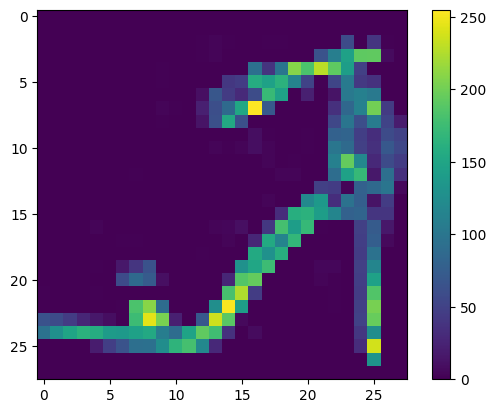

In [3]:
# Using Matplotlib to visualize our data
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
# Preprocessing our data
train_images = train_images / 255.0
test_images = test_images / 255.0

Our neural network has three layers .
1-input layer: this layer takes an input of shape (28,28) which is the size of the images. the flatten transforms this 2d array into 1d array of 784 pixels . this is necessary because next layer requires 1d inputs.

2- hidden layer: this layer has 128 neurons . it uses the relu activation function . the function returns 0 if it receives any negative input , but for any positive value x it returns that value back. it's cheap to compute and helps the model learn complex patterns.

3-output layer: this layer has 10 neurons , one for each of the 10 classes .
it uses the softmax activation function, which outputs a vectore representing the probability distributionsof a list of potential outcomes. it's a generalization of the sigmoid function that squashes a k-dimensional vector of arbitraty real values into k-dimentional vector of real values in the range (0,1) that add up to 1.  In this case, it will return the probabilities of the image belonging to each of the 10 classes.

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Input layer 1
    keras.layers.Dense(128, activation='relu'),   # Hidden layer 2
    keras.layers.Dense(10, activation='softmax')  # Output layer 3
])

Adam is the algorithm that the model will use to optimize the weights during training. Adam is a popular choice because it combines the advantages of two other extensions of stochastic gradient descent: AdaGrad and RMSProp. It adapts the learning rate based on how well the model is performing, which can lead to more effective and efficient training.

Loss Function (Sparse Categorical Crossentropy): This is the function that the model will try to minimize during training. It measures how well the model’s predictions match the true values. ‘Sparse Categorical Crossentropy’ is often used in multi-class classification problems where the classes are mutually exclusive. It’s called ‘sparse’ because it’s designed for scenarios where the labels are integers, rather than one-hot encoded arrays.

Metrics (Accuracy): This is the list of metrics to be evaluated by the model during training and testing. ‘Accuracy’ is a common metric for classification problems. It simply measures the proportion of correct predictions made by the model.

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4928 - accuracy: 0.8267
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3738 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3318 - accuracy: 0.8801
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3101 - accuracy: 0.8872
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2925 - accuracy: 0.8927


In [8]:
test_loss, test_acc =model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3658 - accuracy: 0.8693
Test accuracy: 0.8693000078201294


print the class name of the prediction with the highest probability for the second sample in the test dataset.

In [9]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[1])])

313/313 [==============================] - 2s 4ms/step
Pullover


In [11]:
COLOR = 'red'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

In [12]:
def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)

In [13]:
def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [14]:
def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print("Try again...")

Pick a number: 3
1/1 [==============================] - 0s 23ms/step


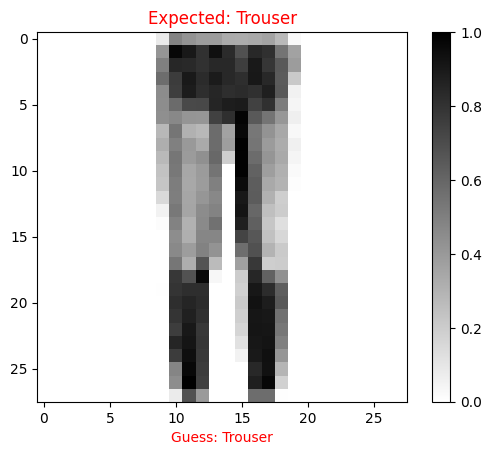

In [15]:
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

We have a dataset that we feed into the network. When the input is processed by the network and the parameters in the network are learned, we say one epoch is done.

Suppose we have a large amount of data, for example, one terabyte. We cannot send it to the network all at once, and commonly we don’t do this because we have some constraints in using memory. So, we can use minibatch instead of batch, which is our entire dataset.

We divide the dataset into smaller parts. We train our network once for each minibatch to complete one epoch. Each time we train the network using minibatches, we update the parameters. However, our speed may be low.

We can use parallel training to speed up our training process.

In [16]:
def add_noise(images, noise_factor=0.5):
    # Add random noise to the input images
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)

    # Clip the images to be between 0 and 1
    noisy_images = np.clip(noisy_images, 0., 1.)

    return noisy_images

# Assuming `x_train` is your Fashion MNIST images
noisy_train_images = add_noise(train_images)
noisy_test_images=add_noise(test_images)

In [17]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal
from imgaug import augmenters
from random import randint

We can intentionally introduce the noise in an image. I am using imaug package which can be used to augment the images with different variations. One such variation can be introduction of noise. Different types of noises can be added to the images. For example:

Salt and Pepper Noise

Gaussian Noise

Periodic Noise

Speckle Noise

Lets introduce salt and pepper noise to our data which is also known as impulse noise. This noise introduces sharp and sudden disturbances in the image signal. It presents itself as sparsely occurring white and black pixels.

In [18]:
# Lets add sample noise - Salt and Pepper
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

train_images_n = seq_object.augment_images(train_images * 255) / 255
test_images_n = seq_object.augment_images(test_images * 255) / 255

**Before adding noise**

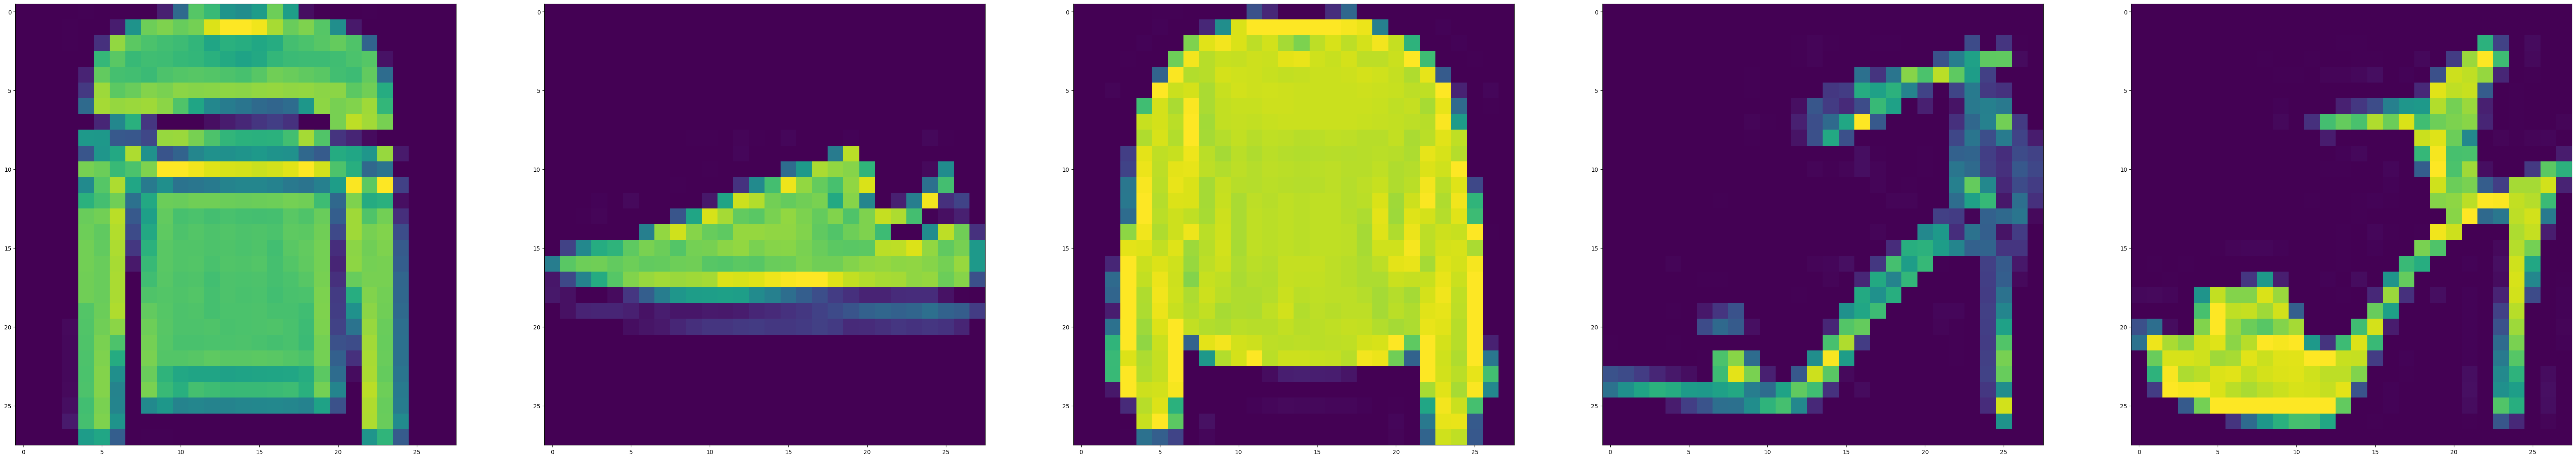

In [19]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_images[i].reshape(28, 28))
plt.show()

**After adding noise**

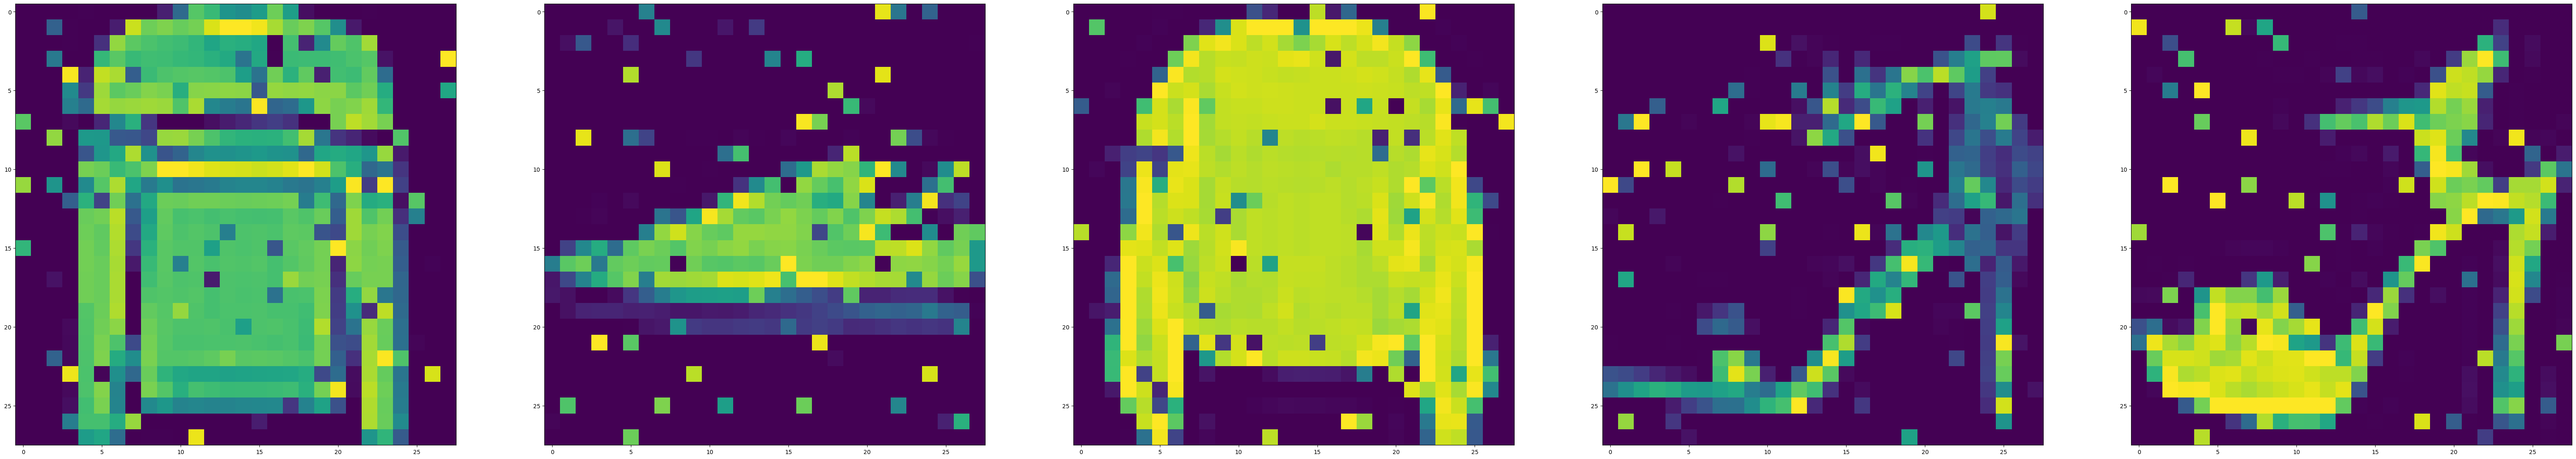

In [20]:

f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_images_n[i].reshape(28, 28))
plt.show()

In [21]:
from tensorflow.keras.layers import Flatten,Dense, Input
from tensorflow.keras.models import Model

## input layer
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

Here’s a breakdown of the layers and their functions:

1.Input Layer: This is the layer where the network receives its input. In this case, the input is a flat vector of length 784, which corresponds to an image of 28x28 pixels (since 28*28 = 784). The line input_layer = Input(shape=(784,)) defines the input layer.

2.Encoding Architecture: These layers progressively reduce the dimensionality of the input data, effectively learning a compressed representation of the input. They are called “encoding” layers because they encode the input data into a different (usually lower-dimensional) space. In this model, there are three encoding layers with 1500, 1000, and 500 nodes respectively.


3.Latent View: This layer represents the compressed version of the input data. It’s often called the “bottleneck” layer, as it’s the layer with the smallest number of nodes. In this model, the latent view has 10 nodes.

4.Decoding Architecture: These layers progressively increase the dimensionality of the data, effectively reconstructing the original input from its compressed representation. They are called “decoding” layers because they decode the data from the compressed space back into its original space. In this model, there are three decoding layers with 500, 1000, and 1500 nodes respectively.

5.Output Layer: This is the layer where the network outputs its prediction. In this case, the output is also a flat vector of length 784, which corresponds to the reconstructed image. The line output_layer  = Dense(784)(decode_layer3) defines the output layer.


remember:

The term “Dense” refers to a fully connected layer, which means each neuron in a layer receives input from all neurons of the previous layer.

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 1500)              1177500   
                                                                 
 dense_3 (Dense)             (None, 1000)              1501000   
                                                                 
 dense_4 (Dense)             (None, 500)               500500    
                                                                 
 dense_5 (Dense)             (None, 10)                5010      
                                                                 
 dense_6 (Dense)             (None, 500)               5500      
                                                                 
 dense_7 (Dense)             (None, 1000)              501000

In [23]:
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))
train_images_n = train_images_n.reshape((train_images.shape[0], -1))
test_images_n = test_images_n.reshape((test_images.shape[0], -1))


Early stopping is a technique used in machine learning to stop training a model when it is no longer improving on a validation set. This is useful for avoiding overfitting, which occurs when a model is trained too well on the training data and performs poorly on new, unseen data.

Here's how early stopping works in the given code:

1. `early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')`:
   - This line creates an instance of the `EarlyStopping` callback from Keras.
   - `monitor='val_loss'` specifies that the validation loss should be monitored for improvement.
   - `min_delta=0` means that the model must improve by at least 0 units of validation loss to be considered an improvement.
   - `patience=10` means that the model will stop training if it doesn't improve for 10 consecutive epochs.
   - `verbose=1` means that a message will be printed when the model stops training.
   - `mode='auto'` means that the mode will be automatically inferred from the `monitor` argument.

2. `model.fit(train_images, train_images, epochs=20, batch_size=2048, validation_data=(test_images, test_images), callbacks=[early_stopping])`:
   - This line trains the model on the training data with early stopping.
   - `train_images` is the input data for training.
   - `train_images` is also the target data for training, which means the model is being trained as an autoencoder to reconstruct the input.
   - `epochs=20` specifies the maximum number of epochs to train for.
   - `batch_size=2048` specifies the number of samples to use in each training batch.
   - `validation_data=(test_images, test_images)` specifies the validation data, which is used to evaluate the model during training.
   - `callbacks=[early_stopping]` specifies the early stopping callback to use during training.

When the model is trained with early stopping, it will stop training when the validation loss stops improving for 10 consecutive epochs. This helps prevent overfitting by stopping training before the model becomes too specialized to the training data.

In [24]:
model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0,
                               patience=10, verbose=1, mode='auto')

model.fit(train_images, train_images, epochs=20, batch_size=2048, validation_data=(test_images, test_images), callbacks=[early_stopping])

Epoch 1/20
30/30 [==============================] - 48s 2s/step - loss: 0.0918 - val_loss: 0.0668
Epoch 2/20
30/30 [==============================] - 43s 1s/step - loss: 0.0562 - val_loss: 0.0457
Epoch 3/20
30/30 [==============================] - 42s 1s/step - loss: 0.0413 - val_loss: 0.0379
Epoch 4/20
30/30 [==============================] - 44s 1s/step - loss: 0.0370 - val_loss: 0.0355
Epoch 5/20
30/30 [==============================] - 46s 2s/step - loss: 0.0345 - val_loss: 0.0327
Epoch 6/20
30/30 [==============================] - 42s 1s/step - loss: 0.0308 - val_loss: 0.0285
Epoch 7/20
30/30 [==============================] - 44s 1s/step - loss: 0.0275 - val_loss: 0.0263
Epoch 8/20
30/30 [==============================] - 43s 1s/step - loss: 0.0254 - val_loss: 0.0255
Epoch 9/20
30/30 [==============================] - 41s 1s/step - loss: 0.0243 - val_loss: 0.0235
Epoch 10/20
30/30 [==============================] - 45s 2s/step - loss: 0.0234 - val_loss: 0.0228
Epoch 11/20
30/30 [

In [25]:
model.fit(train_images_n, train_images, epochs=20, batch_size=2048, validation_data=(test_images_n, test_images), callbacks=[early_stopping])


Epoch 1/20
30/30 [==============================] - 42s 1s/step - loss: 0.0215 - val_loss: 0.0187
Epoch 2/20
30/30 [==============================] - 41s 1s/step - loss: 0.0180 - val_loss: 0.0178
Epoch 3/20
30/30 [==============================] - 42s 1s/step - loss: 0.0175 - val_loss: 0.0175
Epoch 4/20
30/30 [==============================] - 43s 1s/step - loss: 0.0175 - val_loss: 0.0183
Epoch 5/20
30/30 [==============================] - 42s 1s/step - loss: 0.0171 - val_loss: 0.0171
Epoch 6/20
30/30 [==============================] - 42s 1s/step - loss: 0.0167 - val_loss: 0.0168
Epoch 7/20
30/30 [==============================] - 41s 1s/step - loss: 0.0167 - val_loss: 0.0168
Epoch 8/20
30/30 [==============================] - 45s 2s/step - loss: 0.0162 - val_loss: 0.0164
Epoch 9/20
30/30 [==============================] - 42s 1s/step - loss: 0.0161 - val_loss: 0.0162
Epoch 10/20
30/30 [==============================] - 41s 1s/step - loss: 0.0159 - val_loss: 0.0160
Epoch 11/20
30/30 [

In [ ]:
preds = model.predict(test_images_n)

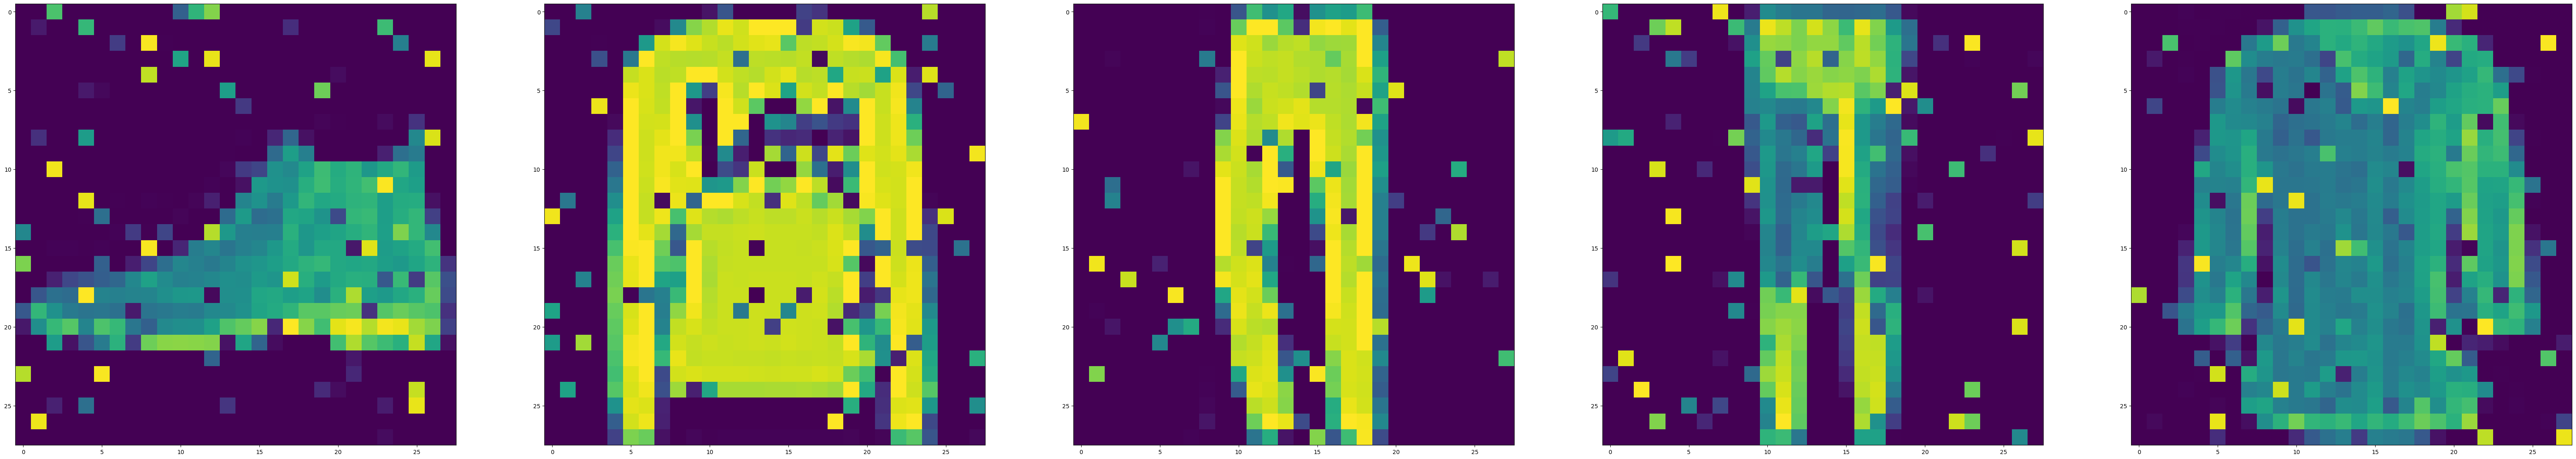

In [27]:
from PIL import Image
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(test_images_n[i].reshape(28, 28))
plt.show()

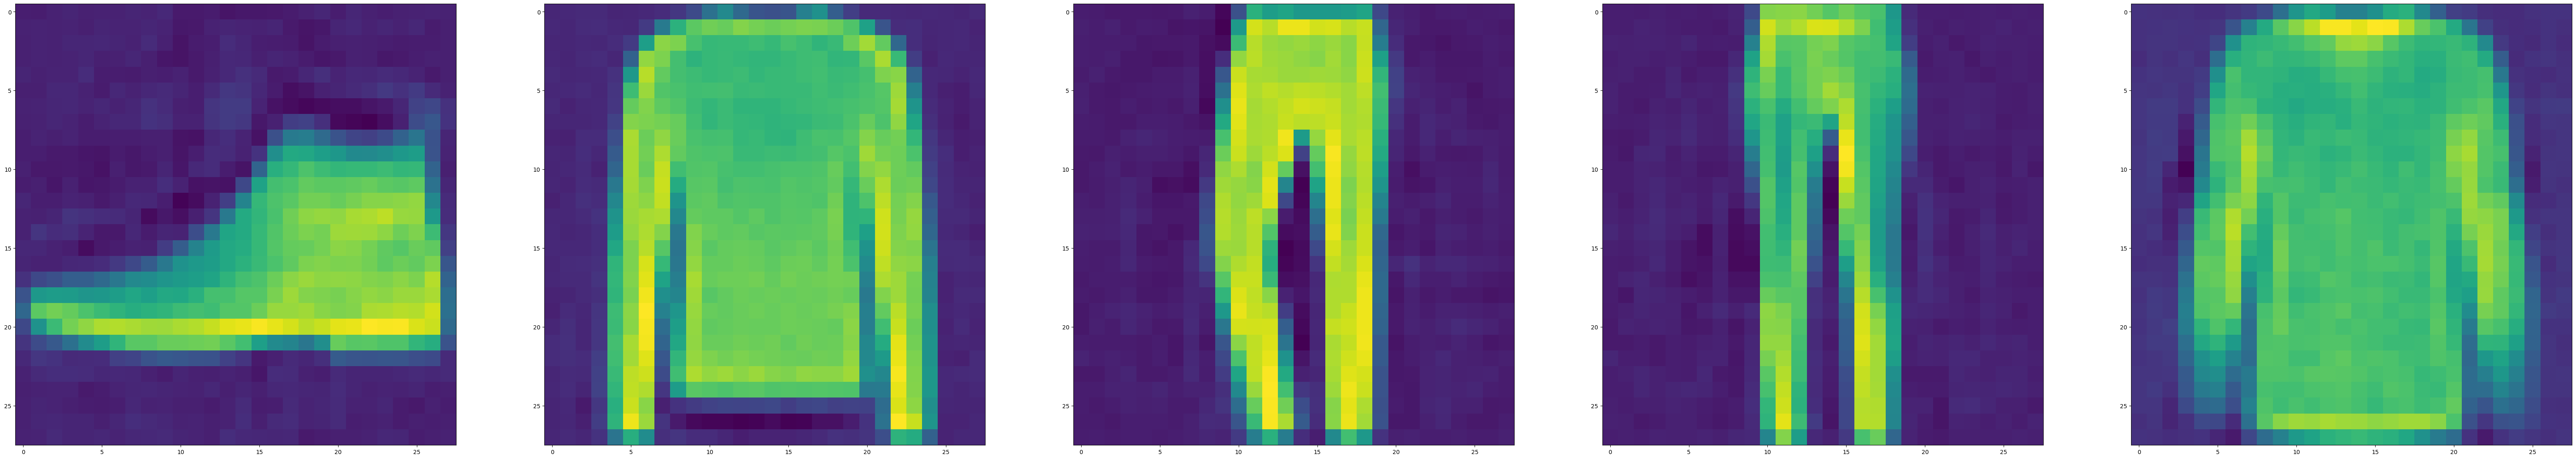

In [28]:

f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()